In [29]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=1000, edgeitems=30)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 2000)

In [30]:
# Some StackOverflow magic to enable importing of local module
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [31]:
from multiLevelCoSurrogates.local import base_dir

In [32]:
df = pd.read_csv(base_dir+'records.csv', index_col='index')
df.head()

,which_model,fidelity,repetition,iteration,mse_high,mse_low,mse_diff
index,,,,,,,
0,hierarchical,both,0,0,234.709377,443.630797,253.505504
1,hierarchical,both,0,1,124.284570,378.376765,217.539198
2,hierarchical,both,0,2,109.286418,378.624423,218.875024
3,hierarchical,both,0,3,111.659027,365.181987,212.238197
4,hierarchical,both,0,4,109.956611,365.543749,212.357868


           repetition    mse_high     mse_low    mse_diff
iteration                                                
0                   1  174.762310  475.114747  218.172355
1                   1  138.281192  454.021892  205.415147
2                   1  136.696908  454.154918  205.156560
3                   1  360.226181  449.666918  204.891871
4                   1  373.472543  452.694210  207.861795


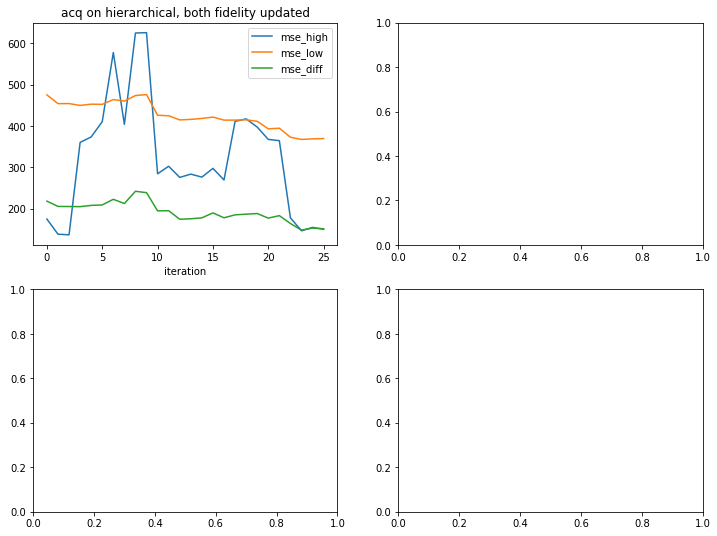

In [33]:
fig, axes = plt.subplots(2,2, figsize=(12,9))

grouped = df.groupby(by=['which_model', 'fidelity'])

for ax, group in zip(axes.flatten(), grouped):
    name, sub_df = group
    sub_df = sub_df.groupby(by='iteration').mean()
#     sub_df.reset_index()
    print(sub_df.head())
    sub_df.plot(y=['mse_high', 'mse_low', 'mse_diff'], ax=ax)
    ax.set_title('acq on {}, {} fidelity updated'.format(*name))
    
plt.show()